In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import sklearn

In [2]:
train_raw= pd.read_csv(r'C:\Users\CHIMEZIE AZIH\hamoye proj\20-restaurant-sales\20-restaurant-sales\data\train.csv')

In [3]:
train_raw.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
test_raw= pd.read_csv(r'C:\Users\CHIMEZIE AZIH\hamoye proj\20-restaurant-sales\20-restaurant-sales\data\test.csv')

In [5]:
test_raw.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [7]:
test_raw.shape

(100000, 42)

In [8]:
train_raw.shape

(137, 43)

In [8]:
## Checking and Removal of Outliers

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64


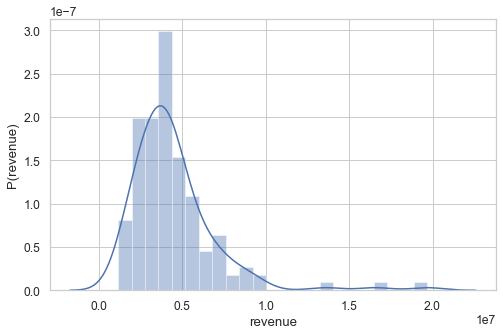

In [9]:
print(train_raw['revenue'].describe())
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(train_raw['revenue'], norm_hist=False, kde=True).set(xlabel='revenue', ylabel='P(revenue)');

In [10]:
train_pro1=train_raw[train_raw['revenue']< 10000000]


count    1.340000e+02
mean     4.181438e+06
std      1.799596e+06
min      1.149870e+06
25%      2.994569e+06
50%      3.887614e+06
75%      5.001114e+06
max      9.652350e+06
Name: revenue, dtype: float64


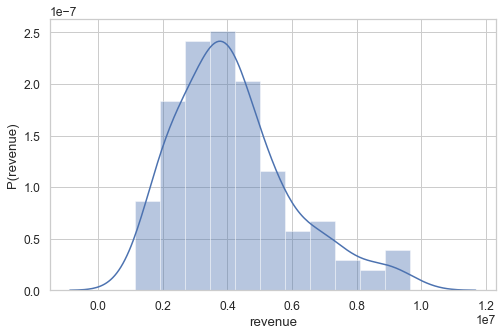

In [11]:
print(train_pro1['revenue'].describe())
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(train_pro1['revenue'], norm_hist=False, kde=True).set(xlabel='revenue', ylabel='P(revenue)');

In [12]:
import time
from datetime import datetime as dt

train_pro1['Open Date']= pd.to_datetime(train_pro1['Open Date'])

In [13]:
train_pro1.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [14]:
train_pro1['year']=train_pro1['Open Date'].dt.year
train_pro1['month']= train_pro1['Open Date'].dt.month
train_pro1['day']= train_pro1['Open Date'].dt.day

In [15]:
train_pro1.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P32,P33,P34,P35,P36,P37,revenue,year,month,day
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,4,5,5,4,3,4,5653753.0,1999,7,17
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,6923131.0,2008,2,14
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,2055379.0,2013,3,9
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,10,6,18,12,12,6,2675511.0,2012,2,2
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3,2,3,4,3,3,4316715.0,2009,5,9


In [16]:
train_year= train_pro1.drop(columns=['Open Date','Id', 'City', 'City Group', 'Type', 'month', 'day'])

In [17]:
train_year.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,year
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,5,3,4,5,5,4,3,4,5653753.0,1999
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,0,0,0,0,0,0,0,0,6923131.0,2008
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,0,0,0,0,0,0,0,0,2055379.0,2013
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,25,12,10,6,18,12,12,6,2675511.0,2012
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,5,1,3,2,3,4,3,3,4316715.0,2009


In [18]:
x= train_year.drop(columns= 'revenue')
y= train_year['revenue']

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,year
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,3.0,5,3,4,5,5,4,3,4,1999
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,3.0,0,0,0,0,0,0,0,0,2008
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,3.0,0,0,0,0,0,0,0,0,2013
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,7.5,25,12,10,6,18,12,12,6,2012
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,3.0,5,1,3,2,3,4,3,3,2009


In [19]:
#Splitting the training dataset into validation and training set

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.30, random_state=42)

In [21]:
#Model Development

In [22]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

data_dmat= xgb.DMatrix(data= x, label= y) 

In [23]:
xg_reg= XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [24]:
xg_reg.fit(x_train, y_train)

[01:44:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[01:44:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster=&#39;gbtree&#39;, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type=&#39;gain&#39;, interaction_constraints=&#39;&#39;,
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints=&#39;()&#39;,
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective=&#39;reg:linear&#39;, random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method=&#39;exact&#39;,
             validate_parameters=1, verbosity=None)

In [25]:
pred=xg_reg.predict(x_test)

In [26]:
pred

array([2426028. , 2644870.2, 2771315.8, 2931631.2, 2418238. , 3085407.8,
       1813934.6, 3130482.5, 2620714.2, 3048864.2, 2877145.8, 2475290.8,
       2958962.2, 2958962.2, 2102836.2, 2517908. , 2797812.5, 2649568.2,
       2311301.8, 2735268. , 2575631. , 2958962.2, 2394909.2, 2651799.8,
       2726690.2, 2620714.2, 2613244.8, 2693738.2, 1893116.8, 2536411.8,
       2022740.2, 2889113.8, 2646481.5, 2866978.2, 2755878.2, 2755060.5,
       3070056.5, 2889113.8, 2892061.2, 2858028.2, 2530160.8],
      dtype=float32)

In [27]:
table= pd.DataFrame(data= pred, columns= ['Prediction'])

In [28]:
table['y-test']= y_test

In [29]:
table

,Prediction,y-test
0,2426028.000,5653753.0
1,2644870.250,NaN
2,2771315.750,NaN
3,2931631.250,NaN
4,2418238.000,4316715.0
5,3085407.750,NaN
6,1813934.625,NaN
7,3130482.500,NaN
8,2620714.250,NaN
9,3048864.250,NaN


In [30]:
y_test

130    3376145.0
67     4052733.0
107    3248660.0
20     5525735.0
43     2732645.0
61     4350573.0
12     1734634.0
112    3784230.0
103    4429512.0
104    4467728.0
45     3752885.0
41     4554237.0
28     4705945.0
48     7201784.0
74     5500818.0
32     3261924.0
85     7495092.0
4      4316715.0
65     1756069.0
100    9652350.0
86     3351383.0
27     5435276.0
17     8213524.0
19     2021934.0
10     3745135.0
113    2097022.0
46     4250758.0
11     5161370.0
52     1763231.0
95     1270499.0
125    4780607.0
128    2383840.0
37     2740687.0
0      5653753.0
68     3836721.0
56     2390534.0
25     3778621.0
57     3258837.0
120    4067566.0
127    7592272.0
15     3218918.0
Name: revenue, dtype: float64

In [31]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE: %f" % (rmse))

RMSE: 2332350.538122


In [32]:
from sklearn.metrics import mean_absolute_error,r2_score

In [33]:
r2= r2_score(y_test, pred)
r2

-0.6089601405204861

In [34]:
from xgboost import cv

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmat, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[01:44:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[01:44:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[01:44:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [35]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,4.171242e+06,102716.789716,4.177519e+06,220841.688674
1,3.830771e+06,97383.276799,3.871086e+06,216935.846333
2,3.530088e+06,89887.268287,3.574238e+06,224673.472677
3,3.266182e+06,82935.908921,3.322211e+06,224366.653467
4,3.021852e+06,71292.099836,3.108948e+06,214744.977553


In [36]:
xg_reg2= xgb.train(params=params, dtrain=data_dmat, num_boost_round=10)


[01:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[01:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


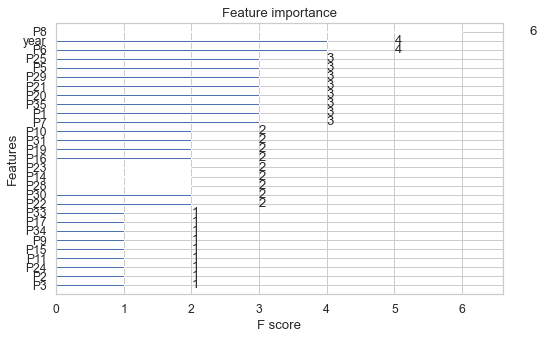

In [37]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [-10,-10]
plt.show()

In [38]:
test_raw.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [39]:
test_raw['Open Date']= pd.to_datetime(test_raw['Open Date'])

test_raw['year']= test_raw['Open Date'].dt.year
test_raw['month']= test_raw['Open Date'].dt.month
test_raw['day']= test_raw['Open Date'].dt.day

In [40]:
test_raw.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P31,P32,P33,P34,P35,P36,P37,year,month,day
0,0,2011-01-22,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,0,0,0,0,0,0,0,2011,1,22
1,1,2011-03-18,Konya,Other,IL,3,4.0,4.0,4.0,2,...,0,0,0,0,0,0,0,2011,3,18
2,2,2013-10-30,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,0,0,0,0,0,0,0,2013,10,30
3,3,2013-05-06,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,4,0,0,0,0,0,0,2013,5,6
4,4,2013-07-31,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,0,0,0,0,0,0,0,2013,7,31


In [41]:
test= test_raw.drop(columns=['Open Date','Id', 'City', 'City Group', 'Type', 'month', 'day'])

In [42]:
test.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,year
0,1,4.0,4.0,4.0,1,2,5,4,5,5,...,3.0,0,0,0,0,0,0,0,0,2011
1,3,4.0,4.0,4.0,2,2,5,3,4,4,...,3.0,0,0,0,0,0,0,0,0,2011
2,3,4.0,4.0,4.0,2,2,5,4,4,5,...,3.0,0,0,0,0,0,0,0,0,2013
3,2,4.0,4.0,4.0,2,3,5,4,5,4,...,3.0,0,4,0,0,0,0,0,0,2013
4,2,4.0,4.0,4.0,1,2,5,4,5,4,...,3.0,0,0,0,0,0,0,0,0,2013


In [43]:
test_pred=xg_reg.predict(test)


In [44]:
test_pred

array([2992219.5, 2349725. , 2490082. , ..., 2392120. , 2726690.2,
       2775131.8], dtype=float32)

In [50]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50.0, 10.0]
plt.show()

ValueError: figure size must be positive finite not [-10.0, -10.0]